### Questão 1.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.solvers import solve
from sympy import Symbol, diff, Piecewise
import sympy

In [2]:
e = 0.02
x = Symbol('x')
c = Symbol('c')
q = Symbol('q') ## q serve como (x/c)
theta = Symbol('theta')

x1_4 =0 ; x2_4 =.225  ; x3_4=1 ; ##dominio naca 4
x1_5 =0 ; x2_5 =.2025 ; x3_5=1 ##dominio naca 5
x_flap=0.75

In [3]:
#EQUAÇÃO QUE DESCREVEM OS FLAPS

delta = 1*sympy.pi/180 #ângulo de atuação do flap
flap_4 = e*(1-(16/9)*((q-1/4))**2) - sympy.tan(delta)*(q-x_flap) #flap para o NACA 5 dígitos
flap_5 = 0.02208*(1-q) - sympy.tan(delta)*(q-x_flap) #flap para o NACA 5 dígitos

In [4]:
chord_4_flap = Piecewise((e*(1-16*((q-1/4))**2),(q>=x1_4) & (q<=x2_4)),(e*(1-(16/9)*((q-1/4))**2),(q>=x2_4) & (q<=x_flap)),(flap_4,(q>=x_flap) & (q<=x3_4)))
chord_5_flap = Piecewise((2.6595*((q)**3 - 0.6075*(q)**2 + 0.1147*(q)),(q>=x1_5) & (q<=x2_5)),(0.02208*(1-q),(q>=x2_5) & (q<=x_flap)),(flap_5,(q>=x_flap)&(q<=x3_5)))

In [5]:
devchord_4_flap = chord_4_flap.diff(q).subs(q,x/c)
devchord_5_flap = chord_5_flap.diff(q).subs(q,x/c)

In [6]:
transform = (c/2)*(1-sympy.cos(theta)) #transformador de x para thetha

devchordtheta_4_flap=devchord_4_flap.subs(x,transform) #aplicação da transformação
devchordtheta_5_flap=devchord_5_flap.subs(x,transform)  

x1_4_transform = sympy.acos(1-2*x1_4);x2_4_transform = sympy.acos(1-2*x2_4);x3_4_transform = sympy.acos(1-2*x3_4);
x1_5_transform = sympy.acos(1-2*x1_5);x2_5_transform = sympy.acos(1-2*x2_5);x3_5_transform = sympy.acos(1-2*x3_5);
x_flap_transform = sympy.acos(1-2*x_flap)

##### **a)** $A_0$ é definido como $A_0 = \alpha -\frac{1}{\pi} \int_{0}^{\pi} \frac{dz}{dz} d\theta$ . Como se quer o $\alpha$ que zere $A_0$, basta igualar a expressão à zero e isolar $\alpha$.

In [7]:
alphazero_4=Symbol('alphazero_4')
alphazero_5=Symbol('alphazero_5')

equation_4 = alphazero_4 + (-1/sympy.pi)*sympy.integrate(devchordtheta_4_flap,(theta,0,sympy.pi))
equation_5 = alphazero_5 + (-1/sympy.pi)*sympy.integrate(devchordtheta_5_flap,(theta,0,sympy.pi))

alphazero_4_rad=solve(equation_4,alphazero_4)
alphazero_5_rad=solve(equation_5,alphazero_5)

alphazero_4_degree=alphazero_4_rad[0] * 180/sympy.pi
alphazero_5_degree=alphazero_5_rad[0] * 180/sympy.pi

print(f'O ângulo de ataque inicial para o NACA 4 dígitos flapeado é: {round(alphazero_4_degree,4)}º')
print(f'O ângulo de ataque inicial para o NACA 5 dígitos flapeado é: {round(alphazero_5_degree,4)}º')

O ângulo de ataque inicial para o NACA 4 dígitos flapeado é: 0.0647º
O ângulo de ataque inicial para o NACA 5 dígitos flapeado é: 0.9390º


##### **b)** A equação pra ângulo de ataque onde ocorre zero-lift é dada por $\alpha_{L_0} = - \frac{1}{\pi} \int_{0}^{\pi} \frac{dz}{dx} (cos \theta -1) d\theta$

In [8]:
alphaL0_4_rad = (-1/sympy.pi)*sympy.integrate(devchordtheta_4_flap*(sympy.cos(theta)-1),(theta,0,sympy.pi))
alphaL0_5_rad = (-1/sympy.pi)*sympy.integrate(devchordtheta_5_flap*(sympy.cos(theta)-1),(theta,0,sympy.pi))

alphaL0_4_degree=alphaL0_4_rad * 180/sympy.pi
alphaL0_5_degree=alphaL0_5_rad * 180/sympy.pi

print(f'O ângulo de ataque zero-lift para o NACA 4 dígitos flapeado é: {round(alphaL0_4_degree,4)}º')
print(f'O ângulo de ataque zero-lift para o NACA 5 dígitos flapeado é: {round(alphaL0_5_degree,4)}º')

O ângulo de ataque zero-lift para o NACA 4 dígitos flapeado é: -2.8088º
O ângulo de ataque zero-lift para o NACA 5 dígitos flapeado é: -2.0522º


##### **c)** O coeficiente de sustentação para um $\alpha$ qualquer é calculado como $C_l = 2 \pi (\alpha - \alpha_{L_0})$

In [9]:
cl_4 = 2*sympy.pi*(alphazero_4_rad[0]-alphaL0_4_rad)
cl_5 = 2*sympy.pi*(alphazero_5_rad[0]-alphaL0_5_rad)

print(f'O CL para o ângulo de ataque inicial para o NACA 4 dígitos flapeado é: {round(cl_4,4)}')
print(f'O CL para o ângulo de ataque inicial para o NACA 5 dígitos flapeado é: {round(cl_5,4)}')

O CL para o ângulo de ataque inicial para o NACA 4 dígitos flapeado é: 0.3151
O CL para o ângulo de ataque inicial para o NACA 5 dígitos flapeado é: 0.3280


##### **d)** Para um aerofólio fino, o centro aerodinâmico e o centro de pressão estão a 0.25% da corda. Logo, calcular o coeficiente de momento em relação ao centro aerodinâmico é o mesmo que calcular em relação à 1/4 da corda.

##### O coeficiente de momento a 1/4 da corda é definido como: $C_m,_{c/4} = \frac{\pi}{4}(A2-A1)$. Ou seja, é necessário calcular $A2$ e $A1$, onde eles são definidos por $A_n = \frac{2}{\pi} \int_{0}^{\pi} \frac{dz}{dx} cos(n \theta)d\theta $

In [10]:
A_1_4 = 2/sympy.pi * sympy.integrate(devchordtheta_4_flap*sympy.cos(1*theta),(theta,0,sympy.pi))
A_2_4 = 2/sympy.pi * sympy.integrate(devchordtheta_4_flap*sympy.cos(2*theta),(theta,0,sympy.pi))
A_1_5 = 2/sympy.pi * sympy.integrate(devchordtheta_5_flap*sympy.cos(1*theta),(theta,0,sympy.pi))
A_2_5 = 2/sympy.pi * sympy.integrate(devchordtheta_5_flap*sympy.cos(2*theta),(theta,0,sympy.pi))

cm_4 = (sympy.pi/4) * (A_2_4-A_1_4)
cm_5 = (sympy.pi/4) * (A_2_5-A_1_5)

print(f'O CM no centro aerodinâmico para o NACA 4 dígitos flapeado é: {round(cm_4,4)}')
print(f'O CM no centro aerodinâmico para o NACA 5 dígitos flapeado é: {round(cm_5,4)}')


O CM no centro aerodinâmico para o NACA 4 dígitos flapeado é: -0.0439
O CM no centro aerodinâmico para o NACA 5 dígitos flapeado é: -0.0157


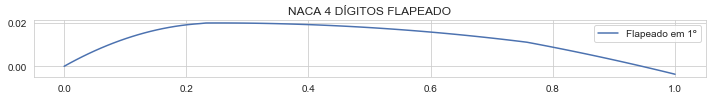

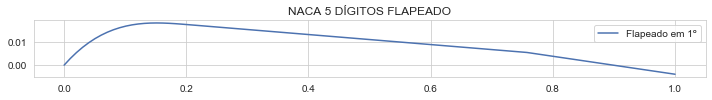

In [11]:
## PLOT DOS AEROFÓLIOS

sns.set_style("whitegrid")
sns.set_palette("deep")

ang_flap=delta*180/sympy.pi

##NACA 4 DÍGITOS FLAPEADO
naca_4 = plt.figure(figsize=(10,1.5))
chord_complete_4 = []

for i in np.arange(0,1,0.01):
    total_chord = chord_4_flap.subs(q,i)
    chord_complete_4.append(total_chord)
    
plt.plot(np.linspace(0,1,100),chord_complete_4,label=f'Flapeado em {ang_flap}º')
plt.grid(True)
plt.legend()
plt.title('NACA 4 DÍGITOS FLAPEADO')
plt.tight_layout()
#plt.savefig('naca4_flap.eps')

##NACA 5 DÍGITOS FLAPEADO
naca_5=plt.figure(figsize=(10,1.5))
chord_complete_5 = []

for i in np.arange(0,1,0.01):
    total_chord = chord_5_flap.subs(q,i)
    chord_complete_5.append(total_chord)
    
plt.plot(np.linspace(0,1,100),chord_complete_5,label=f'Flapeado em {ang_flap}º')
plt.grid(True)
plt.legend()
plt.title('NACA 5 DÍGITOS FLAPEADO')
plt.tight_layout()
#plt.savefig('naca5_flap.eps')